# Exercise 03

### schreibe txt in parquet um

In [15]:
import pandas as pd
import os

# Pfad zur CSV-Datei (im gleichen Ordner wie das Skript)
input_file = "PSD_noise_signal.csv"

# Verzeichnis der CSV-Datei ermitteln
directory = os.path.dirname(input_file)

# Vollständigen Pfad für die Parquet-Datei erstellen
output_file = os.path.join(directory, "PSD_noise_signal.parquet")

# CSV-Datei einlesen
df = pd.read_csv(input_file)

# DataFrame als Parquet-Datei speichern
df.to_parquet(output_file, index=False)


### Read txt data

Conversion V/Hz : 0.5760 V/MHz


C:\Users\samse\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


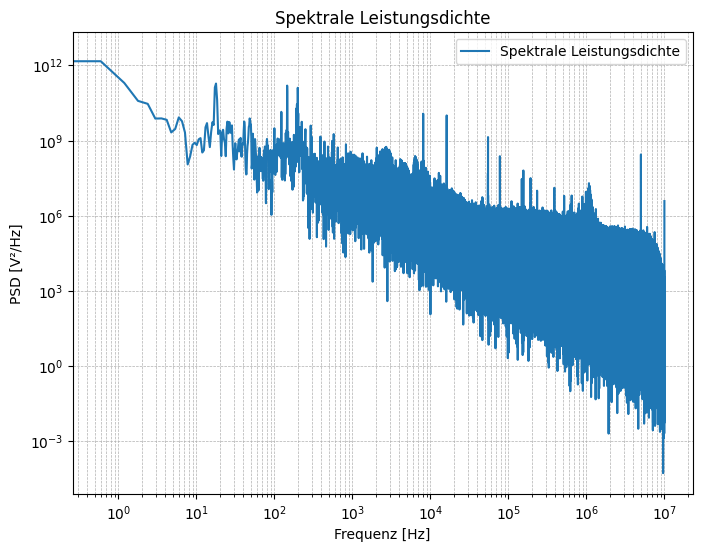

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def read_and_plot(filename):
    # Datei einlesen
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    # Header in Zeile 4 (Index 3)
    headers = lines[3].strip().split(',')
    
    # Daten ab Zeile 5 einlesen und korrekt in numpy Array umwandeln
    data = np.genfromtxt(lines[4:], delimiter=',', dtype=np.float64, invalid_raise=False)
    
    # Entfernen von NaN-Werten, falls Zeilen fehlerhaft sind
    data = data[~np.isnan(data).any(axis=1)]
    
    time = data[:, 0]  # x-Werte
    sig = data[:, 1]   # y-Werte
    
    # Spektrale Leistungsdichte berechnen
    zff = 1
    coeff_VHz = 0.576e-6
    print('Conversion V/Hz : {:0.4f} V/MHz'.format(coeff_VHz * 1e6))
    
    spc = np.abs(np.fft.rfft(np.blackman(len(time)) * (sig / -coeff_VHz), 
                              int(2**(np.log2(len(sig)) // 1 + zff)))) / len(time)
    freq = np.fft.rfftfreq(int(2**(np.log2(len(sig)) // 1 + zff)), np.mean(np.diff(time)))
    
    psds = 2 * spc**2 / (np.sum(np.blackman(len(time))**2) / (len(sig)**2 * np.mean(np.diff(time))))
    
    # Plot der spektralen Leistungsdichte
    plt.figure(figsize=(8, 6))
    plt.loglog(freq, psds, label='Spektrale Leistungsdichte')
    plt.plot(color = 'green')
    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('PSD [V²/Hz]')
    plt.title('Spektrale Leistungsdichte')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Beispielaufruf
read_and_plot('PSD_noise_signal.txt')


### Try faster code with conversion to csv

In [10]:
import csv
import os

def convert_txt_to_csv(txt_file):
    # Bestimmen des Ausgabe-Dateinamens
    csv_file = os.path.splitext(txt_file)[0] + ".csv"
    
    with open(txt_file, "r", encoding="utf-8") as infile:
        lines = infile.readlines()
    
    # Überspringe die ersten 4 Zeilen und verwende die fünfte als Header
    headers = lines[4].strip().split(",")
    data = [line.strip().split(",") for line in lines[5:]]
    
    with open(csv_file, "w", newline="", encoding="utf-8") as outfile:
        writer = csv.writer(outfile)
        writer.writerow(headers)  # Schreibe Header
        writer.writerows(data)  # Schreibe die restlichen Zeilen
    
    print(f"CSV-Datei wurde gespeichert als: {csv_file}")

# Beispielaufruf
convert_txt_to_csv("PSD_noise_signal.txt")

CSV-Datei wurde gespeichert als: PSD_noise_signal.csv


Conversion V/Hz : 0.5760 V/MHz


C:\Users\samse\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


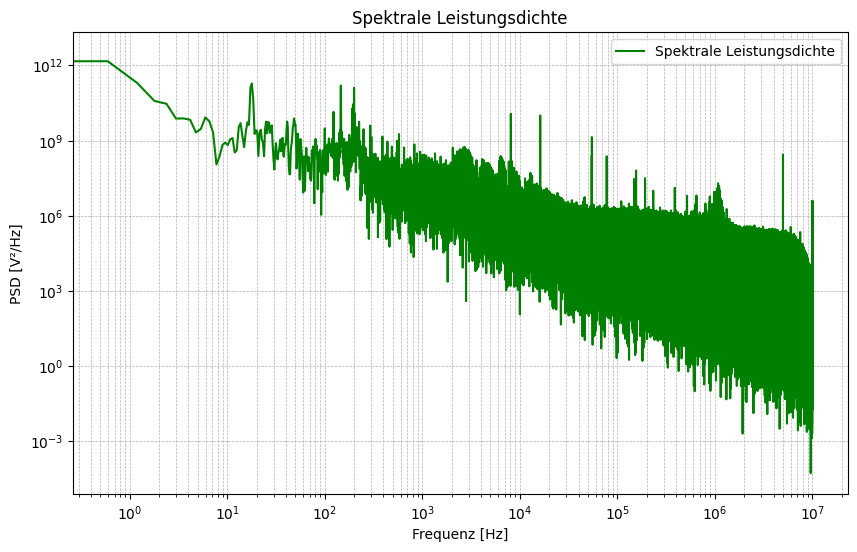

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_and_plot(csv_filename):
    # CSV-Datei einlesen (Header in Zeile 0, Daten ab Zeile 1)
    data = pd.read_csv(csv_filename)
    
    time = data.iloc[:, 0].values  # x-Werte
    sig = data.iloc[:, 1].values   # y-Werte
    
    # Spektrale Leistungsdichte berechnen
    zff = 1
    coeff_VHz = 0.576e-6
    print('Conversion V/Hz : {:0.4f} V/MHz'.format(coeff_VHz * 1e6))
    
    spc = np.abs(np.fft.rfft(np.blackman(len(time)) * (sig / -coeff_VHz), 
                              int(2**(np.log2(len(sig)) // 1 + zff)))) / len(time)
    freq = np.fft.rfftfreq(int(2**(np.log2(len(sig)) // 1 + zff)), np.mean(np.diff(time)))
    
    psds = 2 * spc**2 / (np.sum(np.blackman(len(time))**2) / (len(sig)**2 * np.mean(np.diff(time))))
    
    # Plot der spektralen Leistungsdichte
    plt.figure(figsize=(10, 6))
    plt.loglog(freq, psds, label='Spektrale Leistungsdichte', color='green')
    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('PSD [V²/Hz]')
    plt.title('Spektrale Leistungsdichte')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Beispielaufruf
read_and_plot('PSD_noise_signal.csv')

### Daten auslesen mit parquet datei anstatt csv

Conversion V/Hz : 0.5760 V/MHz


C:\Users\samse\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


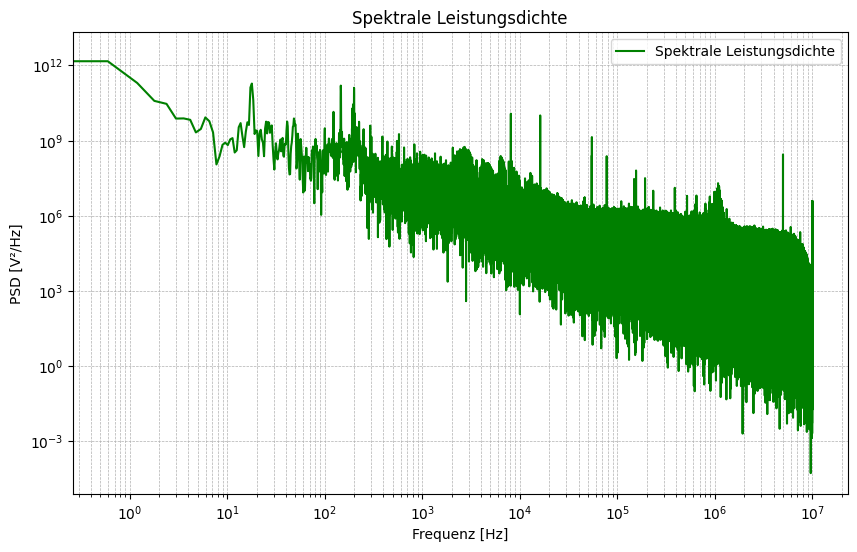

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_and_plot(parquet_filename):
    # Parquet-Datei einlesen
    data = pd.read_parquet(parquet_filename)
    
    time = data.iloc[:, 0].values  # x-Werte
    sig = data.iloc[:, 1].values   # y-Werte
    
    # Spektrale Leistungsdichte berechnen
    zff = 1
    coeff_VHz = 0.576e-6
    print('Conversion V/Hz : {:0.4f} V/MHz'.format(coeff_VHz * 1e6))
    
    spc = np.abs(np.fft.rfft(np.blackman(len(time)) * (sig / -coeff_VHz), 
                              int(2**(np.log2(len(sig)) // 1 + zff)))) / len(time)
    freq = np.fft.rfftfreq(int(2**(np.log2(len(sig)) // 1 + zff)), np.mean(np.diff(time)))
    
    psds = 2 * spc**2 / (np.sum(np.blackman(len(time))**2) / (len(sig)**2 * np.mean(np.diff(time))))
    
    # Plot der spektralen Leistungsdichte
    plt.figure(figsize=(10, 6))
    plt.loglog(freq, psds, label='Spektrale Leistungsdichte', color='green')
    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('PSD [V²/Hz]')
    plt.title('Spektrale Leistungsdichte')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Beispielaufruf (achte darauf, dass die Datei im selben Ordner liegt)
read_and_plot('PSD_noise_signal.parquet')


### Plot beta-separation Line

Conversion V/Hz : 0.5760 V/MHz


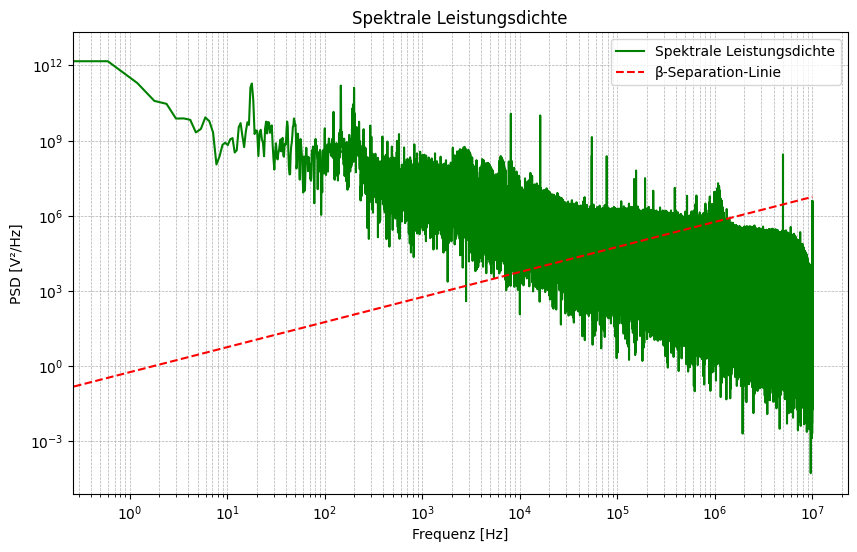

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def read_and_plot(parquet_filename):
    # Parquet-Datei einlesen
    data = pd.read_parquet(parquet_filename)
    
    time = data.iloc[:, 0].values  # x-Werte
    sig = data.iloc[:, 1].values   # y-Werte
    
    # Spektrale Leistungsdichte berechnen
    zff = 1
    coeff_VHz = 0.576e-6
    print('Conversion V/Hz : {:0.4f} V/MHz'.format(coeff_VHz * 1e6))
    
    spc = np.abs(np.fft.rfft(np.blackman(len(time)) * (sig / -coeff_VHz), 
                              int(2**(np.log2(len(sig)) // 1 + zff)))) / len(time)
    freq = np.fft.rfftfreq(int(2**(np.log2(len(sig)) // 1 + zff)), np.mean(np.diff(time)))
    
    psds = 2 * spc**2 / (
        np.sum(np.blackman(len(time))**2) 
        / (len(sig)**2 * np.mean(np.diff(time)))
    )
    
    # Plot der spektralen Leistungsdichte
    plt.figure(figsize=(10, 6))
    plt.loglog(freq, psds, label='Spektrale Leistungsdichte', color='green')
    
    # ------------------------------------------------
    # Beta-Separation-Linie anhand der Formel:
    # Sδν(f) = (8 * ln(2) / π²) * f
    # ------------------------------------------------
    beta_sep = (8 * np.log(2) / (np.pi**2)) * freq
    plt.loglog(freq, beta_sep, 'r--', label='β-Separation-Linie')
    
    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('PSD [V²/Hz]')
    plt.title('Spektrale Leistungsdichte')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Beispielaufruf
# Achte darauf, dass die Parquet-Datei im gleichen Verzeichnis liegt.
read_and_plot('PSD_noise_signal.parquet')



### Fit 1/f noise and cross point!!!

Conversion V/Hz : 0.5760 V/MHz
Schnittpunkt der 1/f-Kurve mit der Beta-Linie: 226.235 kHz


C:\Users\samse\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


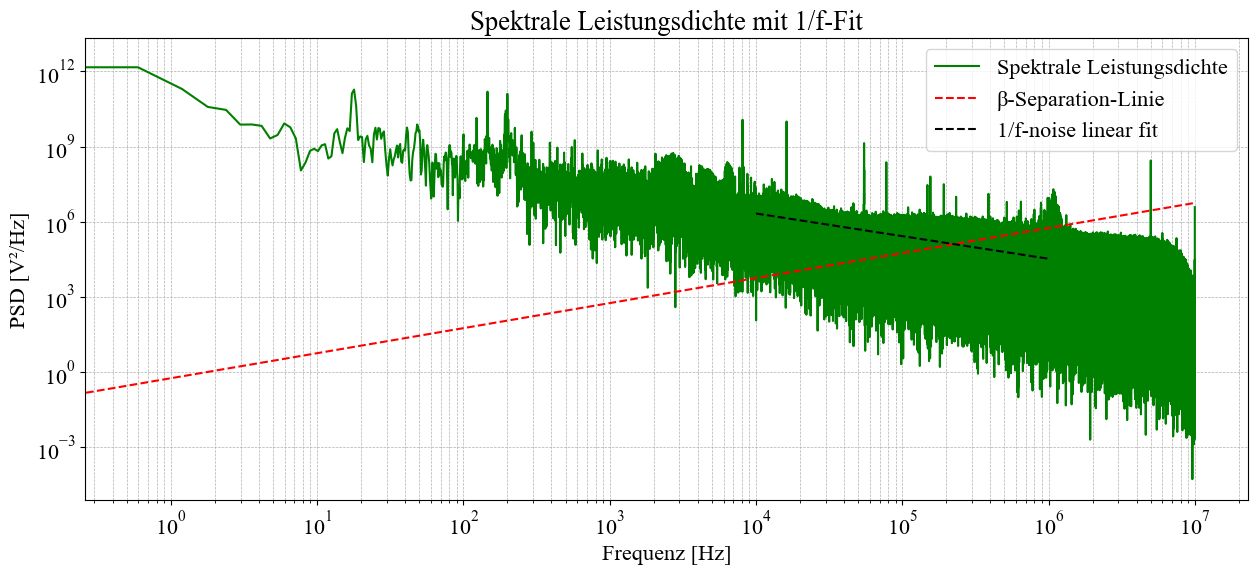

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16

def power_law(f, A, B):
    """1/f-Funktion mit Schutz vor Null-Werten"""
    f_safe = np.maximum(f, 1e-6)  # Sicherstellen, dass f nie 0 ist
    return A * f_safe**(-B)

def read_and_plot(parquet_filename):
    try:
        # Parquet-Datei einlesen
        data = pd.read_parquet(parquet_filename)
    except Exception as e:
        print(f"Error reading {parquet_filename}: {e}")
        return

    
    time = data.iloc[:, 0].values  # Zeit
    sig = data.iloc[:, 1].values   # Signal

    # Parameter für Spektrale Leistungsdichte
    zff = 1
    coeff_VHz = 0.576e-6
    print('Conversion V/Hz : {:0.4f} V/MHz'.format(coeff_VHz * 1e6))

    # FFT-Länge berechnen
    fft_length = int(2**(np.floor(np.log2(len(sig))) + zff))

    spc = np.abs(np.fft.rfft(np.blackman(len(time)) * (sig / -coeff_VHz), fft_length)) / len(time)

    global freq
    freq = np.fft.rfftfreq(fft_length, np.mean(np.diff(time)))

    global psds
    psds = 2 * spc**2 / (
        np.sum(np.blackman(len(time))**2) 
        / (len(sig)**2 * np.mean(np.diff(time)))
    )

    # Beta-Separation-Linie
    beta_sep_full = (8 * np.log(2) / (np.pi**2)) * freq

    # Fit-Grenzen für 1/f-Anpassung setzen
    idx = np.where((freq > 1e4) & (psds < 4e7) & (freq < 1e6))

    
    freq_idx = freq[idx[0]]
    psds_idx = psds[idx[0]]

    if len(freq_idx) == 0 or len(psds_idx) == 0:
        print("No valid data points for curve fitting.")
        return

    # Curve Fitting mit Power Law (1/f)
    try:
        popt_ps, _ = curve_fit(
            power_law, freq_idx, psds_idx, 
            p0=[1e6, 1],  # Startwerte
            bounds=([1e-6, 0], [1e12, 5])  # Grenzen für A und B setzen
        )
    except RuntimeError:
        print("Curve fitting failed.")
        return

    # Berechnung der gefitteten 1/f-Kurve
    fit_curve = power_law(freq_idx, *popt_ps)

    # Berechnung des Schnittpunkts mit der Beta-Separation-Linie
    beta_sep = (8 * np.log(2) / (np.pi**2)) * freq_idx
    id_crossing = np.argwhere(np.diff(np.sign(fit_curve - beta_sep))).flatten()

    if len(id_crossing) > 0:
        global cfreq
        cfreq = freq_idx[id_crossing][0]
        #print(cfreq)
        print('Schnittpunkt der 1/f-Kurve mit der Beta-Linie: {:.3f} kHz'.format(cfreq * 1e-3))
    else:
        print("Kein Schnittpunkt gefunden.")


    # Plot der spektralen Leistungsdichte
    plt.figure(figsize=(15, 6))
    plt.loglog(freq, psds, label='Spektrale Leistungsdichte', color='green')
    plt.loglog(freq, beta_sep_full, 'r--', label='β-Separation-Linie')
    plt.loglog(freq_idx, fit_curve, label=f'1/f-noise linear fit', color='black', linestyle='--')

    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('PSD [V²/Hz]')
    plt.title('Spektrale Leistungsdichte mit 1/f-Fit')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Beispielaufruf
read_and_plot('PSD_noise_signal.parquet')



### Calculate area A1

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid  # Importing trapezoid from scipy


def integrate_psd_data(freq, psds, cfreq):
    """Berechnet die Fläche unter der PSD-Kurve von 10 Hz bis cfreq"""
    
    global f_min
    f_min = 1  # Untere Integrationsgrenze
    global f_max
    f_max = cfreq  # Obere Integrationsgrenze

    # Filter: Frequenzen und zugehörige PSD-Werte im Integrationsbereich auswählen
    mask = (freq >= f_min) & (freq <= f_max)
    freq_selected = freq[mask]
    psds_selected = psds[mask]

    if len(freq_selected) < 2:
        print("Nicht genügend Datenpunkte für die Integration.")
        return None

    # Integration der PSD-Daten mit der Simpson-Regel (präziser als Trapezregel)
    A1 = np.trapezoid(psds_selected, freq_selected)


    print(f"A1 (Fläche unter der PSD-Kurve von {f_min} Hz bis {f_max} Hz): {A1:.3e}")
    return A1

# Beispielaufruf mit den berechneten PSD-Werten und Frequenzen
# (freq und psds stammen aus deinem vorherigen Code!)
#cfreq = 25000  # Beispielwert für den Schnittpunkt in Hz
A1 = integrate_psd_data(freq, psds, cfreq)
print("Area A1 is:", A1)


A1 (Fläche unter der PSD-Kurve von 1 Hz bis 226235.38969391707 Hz): 1.174e+12
Area A1 is: 1174019636768.6094


### Calculate FWHM

In [81]:

FWHM = 1e-6 * np.sqrt(8* np.log(2) * A1)

print("FWHM:", FWHM, "MHz")


FWHM: 2.7895443997949463 MHz


## Results

In [83]:
print("Schnittpunkt der 1/f-Kurve mit der Beta-Linie:", round(1e-3*cfreq,3), "kHz")
print("Area under the curve from", round(1e-3*f_min,3), "kHz to", round(1e-3*f_max,3), "kHz is", round(1e-6*A1,3), "kHz^2" )
print("FWHM of the 729nm Laser is", round(FWHM,3), "MHz")

Schnittpunkt der 1/f-Kurve mit der Beta-Linie: 226.235 kHz
Area under the curve from 0.001 kHz to 10000.0 kHz is 1403301.885 kHz^2
FWHM of the 729nm Laser is 2.79 MHz


### Integrate everything

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid  # Importing trapezoid from scipy


def integrate_psd_data(freq, psds, cfreq):
    """Berechnet die Fläche unter der PSD-Kurve von 10 Hz bis cfreq"""
    
    global f_min
    f_min = 1  # Untere Integrationsgrenze
    global f_max
    f_max = 1e7  # Obere Integrationsgrenze

    # Filter: Frequenzen und zugehörige PSD-Werte im Integrationsbereich auswählen
    mask = (freq >= f_min) & (freq <= f_max)
    freq_selected = freq[mask]
    psds_selected = psds[mask]

    if len(freq_selected) < 2:
        print("Nicht genügend Datenpunkte für die Integration.")
        return None

    # Integration der PSD-Daten mit der Simpson-Regel (präziser als Trapezregel)
    A1 = np.trapezoid(psds_selected, freq_selected)


    print(f"A1 (Fläche unter der PSD-Kurve von {f_min} Hz bis {f_max} Hz): {A1:.3e}")
    return A1

# Beispielaufruf mit den berechneten PSD-Werten und Frequenzen
# (freq und psds stammen aus deinem vorherigen Code!)
#cfreq = 25000  # Beispielwert für den Schnittpunkt in Hz
A1 = integrate_psd_data(freq, psds, cfreq)
print("Area A1 is:", A1)




FWHM = 1e-6 * np.sqrt(8* np.log(2) * A1)

print("FWHM:", FWHM, "MHz")

A1 (Fläche unter der PSD-Kurve von 1 Hz bis 10000000.0 Hz): 1.403e+12
Area A1 is: 1403301884626.6477
FWHM: 2.7895443997949463 MHz
